# Mapa de Conecciones 
Combina un Grafo con un Mapa de Puntos. Muestra en un espacio geográfico la distribución de puntos de interés y como existe una relación entre ellos. Si esta relación es direccional y codifica movimiento o flujo, se le denomina Mapa de Flujo. Para poder graficarlo necesito la posición geográfica de cada punto y la información sobre la conección entre cada punto (lista de ejes). 

### Ejemplo de uso    
- Visualizar patrones de migración anuales    
- Patrones de exportación    
- Rutas aereas    
- Líneas de metro   

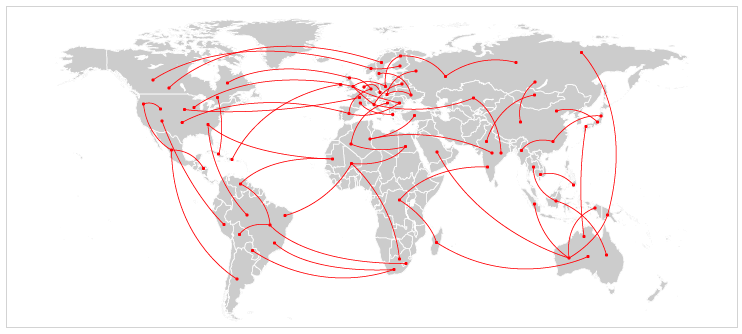

### Consejos
- Yo puedo calcular las mismas propiedades que tiene un grafo y aplicar las mismas tecnicas de graficación que en un grafo
- Puedo introducir una variable al gráfico con las siguientes técticas:
  - Diferente ancho de las conecciones para codificar una variable numérica
  - Diferente color de las conecciones para codificar una variable numérica o categórica
- No necesito algoritmos de posicionamiento de grafos, debido a que los puntos ya tienen un posicionamiento fijo en el mapa.

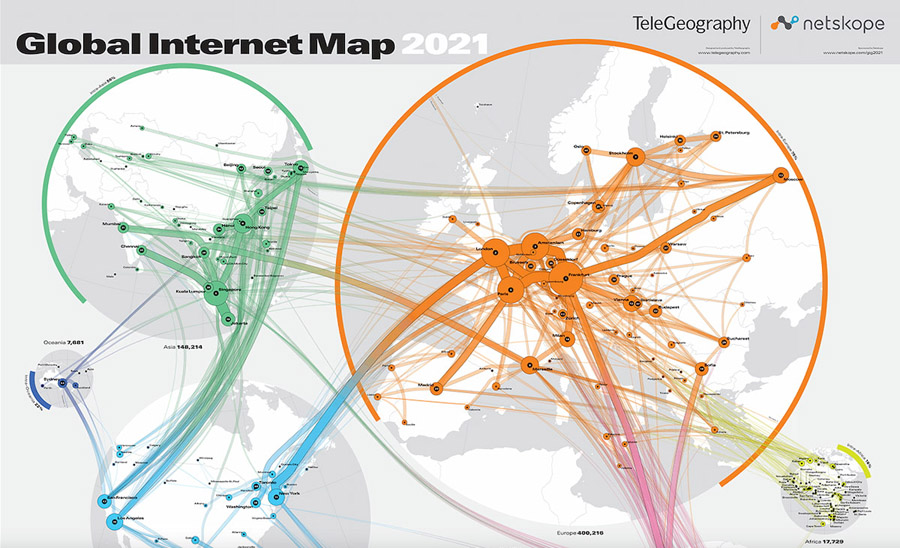

## En esta clase
### Datos
Información sobre movimientos de surfistas a lo largo de diferentes paises del mundo
### Objetivos
1. Visualizar los movimientos de los surfistas

## Referencias
- https://datavizcatalogue.com/ES/metodos/mapa_de_conexiones.html

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/viajes_surfistas.csv')
df = df.dropna()
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


In [3]:
nodos_1 = df[['homecountry', 'homelat', 'homelon']]
nodos_1.columns = ['label', 'lat', 'lon']
nodos_1_agg = nodos_1.groupby(['lat', 'lon']).first()
nodos_1_agg = nodos_1_agg.reset_index()
nodos_1_agg

,lat,lon,label
0,-53.773631,-67.707288,Argentina
1,-51.733333,-72.516667,Chile
2,-46.548628,-71.631977,Argentina
3,-45.878760,170.502798,New Zealand
4,-44.885637,168.666159,New Zealand
...,...,...,...
1641,61.924110,25.748151,Finland
1642,62.411363,-149.072971,United States of America
1643,63.264262,10.505392,Norway
1644,64.200841,-149.493673,United States of America


In [4]:
nodos_2 = df[['travelcountry', 'travellat', 'travellon']]
nodos_2.columns = ['label', 'lat', 'lon']
nodos_2_agg = nodos_2.groupby(['lat', 'lon']).first()
nodos_2_agg = nodos_2_agg.reset_index()
nodos_2_agg

,lat,lon,label
0,-51.055000,-72.832300,Chile
1,-46.592167,-70.932012,Argentina
2,-45.911490,170.490247,New Zealand
3,-45.911290,170.490020,New Zealand
4,-45.904483,170.510135,New Zealand
...,...,...,...
4076,64.133300,-21.933300,Iceland
4077,68.077244,13.474686,Norway
4078,68.207469,14.480151,Norway
4079,68.659089,18.883573,Norway


In [5]:
nodos = pd.concat([nodos_1_agg, nodos_2_agg])
nodos = nodos.groupby(['lat', 'lon']).first()
nodos = nodos.reset_index()
nodos

,lat,lon,label
0,-53.773631,-67.707288,Argentina
1,-51.733333,-72.516667,Chile
2,-51.055000,-72.832300,Chile
3,-46.592167,-70.932012,Argentina
4,-46.548628,-71.631977,Argentina
...,...,...,...
5720,68.077244,13.474686,Norway
5721,68.207469,14.480151,Norway
5722,68.659089,18.883573,Norway
5723,78.217424,15.636744,Norway


In [6]:
nodos['id'] = nodos.apply(lambda x: str(x.lat) + ',' + str(x.lon), axis=1)
nodos

,lat,lon,label,id
0,-53.773631,-67.707288,Argentina,"-53.7736313,-67.7072878"
1,-51.733333,-72.516667,Chile,"-51.733333,-72.516667"
2,-51.055000,-72.832300,Chile,"-51.055,-72.8323"
3,-46.592167,-70.932012,Argentina,"-46.59216709,-70.93201176"
4,-46.548628,-71.631977,Argentina,"-46.5486283,-71.6319773"
...,...,...,...,...
5720,68.077244,13.474686,Norway,"68.07724353,13.4746857"
5721,68.207469,14.480151,Norway,"68.20746877,14.48015147"
5722,68.659089,18.883573,Norway,"68.65908859,18.88357262"
5723,78.217424,15.636744,Norway,"78.21742429,15.63674421"


In [7]:
# Mapa de Puntos
# https://plotly.com/python/scattermapbox/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(
    nodos, 
    lat="lat", 
    lon="lon",     
    mapbox_style="carto-positron", 
    zoom=0.5,
    color="label",
)
fig.update_traces(
    marker=dict(
        size=4,
    )
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
lats = np.empty(len(df) * 2)
lats[::2] = df['homelat']
lats[1::2] = df['travellat']
lats[2::3] = None

lons = np.empty(len(df) * 2)
lons[::2] = df['homelon']
lons[1::2] = df['travellon']
lons[2::3] = None

In [26]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = lons,
    lat = lats,
    marker = {
        'size': 5
    },
    line={
        'width': 1,
    },
    opacity=0.05
))

fig.update_layout(
    mapbox = {
        'center': {'lon': 10, 'lat': 10},
        'style': "carto-darkmatter",
        'center': {'lon': -20, 'lat': -20},
        'zoom': 1
    },
    showlegend = False,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

# Ejemplo adicional que añade colores a los puntos por una variable categórica

In [13]:
ejes = pd.DataFrame()
ejes['start_lat'] = df['homelat']
ejes['end_lat'] = df['travellat']
ejes['start_lon'] = df['homelon']
ejes['end_lon'] = df['travellon']
ejes['category'] = df['homecountry']
ejes['src'] = df.apply(lambda x: str(x.homelat) + ',' + str(x.homelon), axis=1)
ejes['dst'] = df.apply(lambda x: str(x.travellat) + ',' + str(x.travellon), axis=1)
ejes['count'] = 1
ejes = ejes.groupby(['src', 'dst']).agg({
    'count': 'count',
    'start_lat': 'first',
    'end_lat': 'first',
    'start_lon': 'first',
    'end_lon': 'first',
    'category': 'first'
})
ejes = ejes.sort_values(by='count')
ejes

count  start_lat  \
src                     dst                                           
-0.023559,37.906193     -1.30858704,36.81370059        1  -0.023559   
37.8857582,-122.1180201 38.53332971,-123.27718545      1  37.885758   
37.9060368,-122.5449763 -28.02396037,153.38746213      1  37.906037   
                        23.316667,-102.366667          1  37.906037   
37.9230693,139.2162435  37.76280911,139.01191815       1  37.923069   
...                                                  ...        ...   
34.975562,138.3827596   34.96330278,138.37420174      98  34.975562   
-33.9034863,151.2682338 -33.9036,151.268             101 -33.903486   
33.6189101,-117.9289469 33.6929,-118.0               137  33.618910   
39.399872,-8.224454     38.63333333,-9.225           143  39.399872   
34.0522342,-118.2436849 33.98906415,-118.46246481    481  34.052234   

                                                     end_lat   start_lon  \
src                     dst                                                
-0.023559,37.906193     -1.30858704,36.81370059    -1.308587   37.906193   
37.8857582,-122.1180201 38.53332971,-123.27718545  38.533330 -122.118020   
37.9060368,-122.5449763 -28.02396037,153.38746213 -28.023960 -122.544976   
                        23.316667,-102.366667      23.316667 -122.544976   
37.9230693,139.2162435  37.76280911,139.01191815   37.762809  139.216243   
...                                                      ...         ...   
34.975562,138.3827596   34.96330278,138.37420174   34.963303  138.382760   
-33.9034863,151.2682338 -33.9036,151.268          -33.903600  151.268234   
33.6189101,-117.9289469 33.6929,-118.0             33.692900 -117.928947   
39.399872,-8.224454     38.63333333,-9.225         38.633333   -8.224454   
34.0522342,-118.2436849 33.98906415,-118.46246481  33.989064 -118.243685   

                                                      end_lon  \
src                     dst                                     
-0.023559,37.906193     -1.30858704,36.81370059     36.813701   
37.8857582,-122.1180201 38.53332971,-123.27718545 -123.277185   
37.9060368,-122.5449763 -28.02396037,153.38746213  153.387462   
                        23.316667,-102.366667     -102.366667   
37.9230693,139.2162435  37.76280911,139.01191815   139.011918   
...                                                       ...   
34.975562,138.3827596   34.96330278,138.37420174   138.374202   
-33.9034863,151.2682338 -33.9036,151.268           151.268000   
33.6189101,-117.9289469 33.6929,-118.0            -118.000000   
39.399872,-8.224454     38.63333333,-9.225          -9.225000   
34.0522342,-118.2436849 33.98906415,-118.46246481 -118.462465   

                                                                   category  
src                     dst                                                  
-0.023559,37.906193     -1.30858704,36.81370059                       Kenya  
37.8857582,-122.1180201 38.53332971,-123.27718545  United States of America  
37.9060368,-122.5449763 -28.02396037,153.38746213  United States of America  
                        23.316667,-102.366667      United States of America  
37.9230693,139.2162435  37.76280911,139.01191815                      Japan  
...                                                                     ...  
34.975562,138.3827596   34.96330278,138.37420174                      Japan  
-33.9034863,151.2682338 -33.9036,151.268                          Australia  
33.6189101,-117.9289469 33.6929,-118.0             United States of America  
39.399872,-8.224454     38.63333333,-9.225                         Portugal  
34.0522342,-118.2436849 33.98906415,-118.46246481  United States of America  

[5122 rows x 6 columns]

In [14]:
ejes = ejes.reset_index()
ejes

,src,dst,count,start_lat,end_lat,start_lon,end_lon,category
0,"-0.023559,37.906193","-1.30858704,36.81370059",1,-0.023559,-1.308587,37.906193,36.813701,Kenya
1,"37.8857582,-122.1180201","38.53332971,-123.27718545",1,37.885758,38.533330,-122.118020,-123.277185,United States of America
2,"37.9060368,-122.5449763","-28.02396037,153.38746213",1,37.906037,-28.023960,-122.544976,153.387462,United States of America
3,"37.9060368,-122.5449763","23.316667,-102.366667",1,37.906037,23.316667,-122.544976,-102.366667,United States of America
4,"37.9230693,139.2162435","37.76280911,139.01191815",1,37.923069,37.762809,139.216243,139.011918,Japan
...,...,...,...,...,...,...,...,...
5117,"34.975562,138.3827596","34.96330278,138.37420174",98,34.975562,34.963303,138.382760,138.374202,Japan
5118,"-33.9034863,151.2682338","-33.9036,151.268",101,-33.903486,-33.903600,151.268234,151.268000,Australia
5119,"33.6189101,-117.9289469","33.6929,-118.0",137,33.618910,33.692900,-117.928947,-118.000000,United States of America
5120,"39.399872,-8.224454","38.63333333,-9.225",143,39.399872,38.633333,-8.224454,-9.225000,Portugal


In [15]:
# Mapa de Conecciones
# https://plotly.com/python/lines-on-mapbox/
# https://plotly.com/python-api-reference/generated/plotly.express.line_mapbox.html
# https://plotly.com/python/lines-on-maps/

# Hack para crear una separación entre cada linea.
lons = np.empty(3 * len(ejes))
lons[::3] = ejes['start_lon']
lons[1::3] = ejes['end_lon']
lons[2::3] = None # Si no hago esto, se va a formar un solo camino, en ves de ejes entre nodo y nodo

lats = np.empty(3 * len(ejes))
lats[::3] = ejes['start_lat']
lats[1::3] = ejes['end_lat']
lats[2::3] = None # Si no hago esto, se va a formar un solo camino, en ves de ejes entre nodo y nodo

In [16]:
# Lamentablemente en Plotly es complicado pintar las lineas de un diferente color
# Aqui una versión alternativa, pero con demasiados puntos (>500) no puede correr eficientemente

import random
map_colores = {}
base_colors = px.colors.qualitative.Light24
for cat in ejes['category']:
    if cat not in map_colores:
        color = random.choice(base_colors)
        map_colores[cat] = color
map_colores

ejes['colores'] = ejes['category'].apply(lambda x: map_colores[x])
ejes

colors = [""] * len(ejes) * 3
colors[::3] = ejes['colores']
colors[1::3] = ejes['colores']
colors[2::3] = ejes['colores']


fig_map = go.Figure()
i = 0
for idx, row in ejes.iterrows():
    start_lat = row.start_lat
    start_lon = row.start_lon
    end_lat = row.end_lat
    end_lon = row.end_lon
    
    lat = [start_lat, end_lat]
    lon = [start_lon, end_lon]
    
    fig_map.add_trace(
        go.Scattermapbox(
            lat = lat,
            lon = lon,
            mode = 'lines+markers',
            opacity= 0.08,
            marker={
                'size': 5,
                'color': row.colores,
            },
            line={
                'width': 1,
                'color': row.colores
            }
        )
    )
    i = i+1
    if i == 400:
        break

fig_map.update_layout(
    mapbox = {
        'center': {'lon': 10, 'lat': 10},
        'style': "carto-darkmatter",
        'center': {'lon': -20, 'lat': -20},
        'zoom': 1
    },
    title_text = 'Movimiento de Surfistas',
    showlegend = False,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig_map